In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
#import random
import itertools
# Create a list specifying the 'edges'
# Here, each edge in the network is specified
# by the 'head' node and the 'tail' node.
#edges = [('a','b'),
#('b','c'),
#('c','a')]
# Make a variable to hold the network
#G = nx.DiGraph(edges)

# Visualize this network
#nx.draw_circular(G,with_labels=True)
#plt.savefig('example_graph_drawing.png')


In [5]:
import matplotlib.pyplot as plt
import networkx as nx

file = open('figure_four.txt', 'r') 
file.readline()
line_list = [line.rstrip('\n') for line in file.readlines() if len(line) > 1]

line_list = [line.split('\t') for line in line_list]
#print(line_list)
for k in range(0, len(line_list)):
    line_list[k][1] = line_list[k][1].replace("(", "")
    line_list[k][1] = line_list[k][1].replace(")", "")
    #line_list[k][1] = line_list[k][1].replace(" ", "")
#line_list[1][0].replace("(", "")
#line_list[0].replace(")", "")

print(line_list)
regulators = []
activator = []
for i in range (0, len(line_list)):
    target = line_list[i]
    print(target[0])
      
for j in range (0, len(line_list)):
    activator.append(line_list[j][1])
    
print(activator)
    
    
    

#edges = [('g7', 'g1'),('g1', 'g2'), ('g2', 'g3'),('g3','g4'),('g4','g5'),('g5','g6'),('g6', 'g7'),('g7','g7')]
#G = nx.DiGraph(edges)

# Visualize this network
#nx.draw_circular(G,with_labels=True)

[['a', ''], ['b', ' a '], ['c', ' a or b ']]
a
b
c
['', ' a ', ' a or b ']


In [6]:
def get_formula(line_list, protein_id):
    regulator = []
    for j in range (0, len(line_list)):
        if len(line_list[j]) == 2:
            #print(line_list[j][1])

            rhs = line_list[j][1]
            tokens =rhs.split(' ')
            print(tokens)
            for token in tokens:
                if (token != 'not' and token != '(' and token != ')' and token != 'Rule' and token != ''):
                    regulator.append(token) #= token#line_list[j]
                    print(regulator)
        if (protein_id == line_list[j][0]):
            
            return line_list[j][1];
            
    #print(regulator)#[1])
    
    
    
get_formula(line_list, line_list[1][0])

['']
['', 'a', '']
['a']


' a '

In [7]:
def get_Index(formula):
    for j in range (0, len(line_list)):
        if len(line_list[j]) ==2 and line_list[j][0] != 'Gene':
            
            if formula == line_list[j][1]:
                index = j
                return index
            #for token in line_list[j][1]:
                #print(token,line_list[j][1])
   # return index
              
print(get_Index(activator[2]))

#print(get_Index("g1"))

2


In [8]:
# def compute_protein_state1(formula, netState):
#     token = formula.split(' ')
#     index_gene = get_Index(formula)
#     #print(line_list)
#     for j in range (0, len(line_list)):
        
#         #rule = get_formula(line_list, line_list[j][0])

#         for k in range (0, len(token)):
#             if line_list[j][0] == token[k]:# and len(line_list[j]) == 2:
#                 state_regulator = netState[j]
#                 if 'not' in token:
#                     if state_regulator == 1:
#                         state_target = 0
#                     else:
#                         state_target = 1
#                 #elif 'or' in token:
#                     #if state_regulator == 1:
#                         #state_target = 1
                    
# #                     elif token[-2] == line_list[j][0]:
# #                         state_regulator = netState[j]
# #                         if state_regulator == 1:
# #                             state_target = 1
# #                         else:
# #                             state_target = 0
#                 else:
#                     if state_regulator == 1:
#                         state_target = 1
#                     else:
#                         state_target = 0
                 
                            
#             return(state_target, index_gene) 


#print(current_state)
#print(regulators[0])
# s, idx = compute_protein_state1(line_list[0][1], current_state)

# print(s)
# print(idx)
# new_state = list(current_state)
# new_state[idx] = s
# print(new_state)
# #print(idx)

#compute_protein_state1(line_list[3][1], [0,0,0,1,1,1,1]

def compute_left(formula, line_list, netstate): 

    print(formula)
    token = formula.split(' ')
    for j in range(0, len(line_list)):
        for k in range(0, len(token)):
            if token[k] == line_list[j][0]:
                #print(k,j,netstate[j])
                state_regulator = netstate[j]
                if state_regulator == 1:
                    state_target = 1
                    return(state_target)
    return(0)

def compute_right(formula,line_list,netstate):
    token = formula.split(' ')
    if 'not' in token:
        for j in range(0, len(line_list)):
            for k in range(0, len(token)):
                if token[k] == line_list[j][0]:
                    state_regulator = netstate[j]
                    if state_regulator == 1:
                        state_target = 0
                    #else:
                    #    state_target = 1
                        return(state_target)
        return(1)
        
    else:
        for j in range(0, len(line_list)):
            for k in range(0, len(token)):
                if token[k] == line_list[j][0]:
                    #print(k,j,netstate[j])
                    state_regulator = netstate[j]
                    if state_regulator == 1:
                        state_target = 1
                        return(state_target)
        return(0)
        


def compute_and(formula, line_list,netstate):
    #index_gene = get_Index(formula)
    token_and = formula.split("and")
    #print(token_and)
    left = token_and[0]
    right = token_and[1]
    first = compute_left(left, line_list,netstate)
    second = compute_right(right,line_list,netstate)
    #print('first',first)
    if first == 1 and second == 1:
        return(1)
    else:
        return(0)
    
    
    
    


def compute_protein_state2(formula, netstate, line_list):
    token = formula.split(' ')
    index_gene = get_Index(formula)
    #print(netstate)
    if 'and' in token:
        state_target = compute_and(formula,line_list,netstate)
        return(state_target, index_gene)
    elif 'not' in token:
        for j in range(0, len(line_list)):
            for k in range(0, len(token)):
                if token[k] == line_list[j][0]:
                    state_regulator = netstate[j]
                    if state_regulator == 1:
                        state_target = 0
                    #else:
                    #    state_target = 1
                        return(state_target, index_gene)
        return(1, index_gene)
        
    else:
        for j in range(0, len(line_list)):
            for k in range(0, len(token)):
                if token[k] == line_list[j][0]:
                    #print(k,j,netstate[j])
                    state_regulator = netstate[j]
                    if state_regulator == 1:
                        state_target = 1
                        return(state_target, index_gene)
        return(0, index_gene)

current_state =[1,0,0]

#current_state1 =[1,0,1,1,1,0,0,0,0,0,0]
s, idx = compute_protein_state2(line_list[2][1], current_state, list(line_list))

#print(s)
#print(idx)
new_state = list(current_state)
new_state[idx] = s
print(new_state)                   
                    

[1, 0, 1]


In [9]:
def compute_next_protein_state_synchronous(activator, curr_state):
    new1_state = list(curr_state)
    #print(new1_state)
    for formula in activator:
        if formula != '':
            s1,idx1 = compute_protein_state2(formula, curr_state,line_list)
        #print(idx1)
        
            new1_state[idx1] = s1
        #return(new1_state)
        #print(idx1)
    return(new1_state)

print(compute_next_protein_state_synchronous(activator, [0,1,1]))

[0, 0, 1]


In [10]:
def compute_next_protein_state_asynchronous(activator, netState):
    next_state_list = list()
    for prot in activator:
        next_state_list.append([prot, list(netState)])
    #print(next_state_list)
    
    length = len(next_state_list)
    
    for i in range(0, length):
        new2_state = list(netState)
        #print(next_state_list[i][0])
        if next_state_list[i][0] != '':
            s2,idx2 = compute_protein_state2(activator[i], new2_state, line_list)
            #print(s2,idx2)
            new2_state[idx2] = s2
            next_state_list[i][1] = new2_state
    return(next_state_list)

#compute_next_protein_state_asynchronous(activator, [0,0,1,1,0,0,1])
compute_next_protein_state_asynchronous(activator, [1,1,0])

[['', [1, 1, 0]], [' a ', [1, 1, 0]], [' a or b ', [1, 1, 1]]]

In [11]:
# def compute_state_space_network_asynchronous(activator, netState):
#     allState = list(map(list, itertools.product([0,1], repeat = len(activator))))
#     node_list = []
      
#     lengthAll = len(allState)
    
#     checker1 = True
    
#     #while (len(node_list) <= lengthAll):
#     allSimulations = []
#     visitedNode = []
#     newSimulation = []
#     next_node_state = []
    
#     for j in range(0, lengthAll):
#         #next_node_state = compute_next_protein_state_asynchronous(activator, allState[j])
#         #for k in range(0, len(next_node_state)):
#             #edgelist.append(allState[j], next_node_state[k][1])
#         checker1 = True   # should be here or outside
#         if not allState[j] in visitedNode or len(visitedNode) == 0:
#             newSimulation = []
#             #node_list.append(allState[j])
#             newSimulation.append(allState[j])
#             while checker1 is True:
#                 if len(newSimulation) == 0:
#                     next_node_state = compute_next_protein_state_asynchronous(activator,newSimulation[-1])
#                 else:
#                     for p in range(0, len(newSimulation)):
#                         next_node_state = compute_next_protein_state_asynchronous(activator,newSimulation[p])

#                 #if next_node_state[j][1] in visitedNode:
#                 for k in range(0, len(next_node_state)):
#                     if next_node_state[k][1] in visitedNode:
#                         checker1 = False
#         #print(new_node_state)
#                     else:
#                     #node_list.append(new_node_state1)
#                         visitedNode.append(next_node_state[k][1])
#                         newSimulation.append(next_node_state[k][1])
                

#             allSimulations.append(newSimulation)
#             #print(len(visitedNode))
#     return(allSimulations)
    
# #print(compute_state_space_network_asynchronous(activator, [0,1,0,0,1,1,0]))
# output = compute_state_space_network_asynchronous(activator, [0,1,0,0,1,1,0])
# print(len(output))

    

In [12]:
[1,2,3] == [1,4,3]

False

In [13]:
##allState = list(map(list, itertools.product([0,1], repeat = len(activator))))
#print(len(allState))

In [14]:
# edgelist2 = []
# for seq in output:
#     sequence = seq
#     edgelist2.extend([(''.join([str(st) for st in sequence[i]]),''.join([str(st) for st in sequence[i + 1]])) for i in range (len(sequence)-1)
#                     ])
    
# G = nx.DiGraph(edgelist2)
# print(edgelist2)
# # Visualize this network
# nx.draw_spring(G,with_labels=True)
# plt.savefig('compute_space_state_network_asynchronous.png')  
# plt.show()    
    

In [15]:
# def compute_state_space_network_synchronous(activator, netState):
#     allState = list(map(list, itertools.product([0,1], repeat = len(activator))))
#     node_list = []
      
#     lengthAll = len(allState)
    
#     checker1 = True
      
#     #while (len(node_list) <= lengthAll):
#     allSimulations1 = []
#     visitedNode = []
#     newSimulation1 = []
    
#     for j in range(0, lengthAll):
#         checker1 = True   
#         if not allState[j] in visitedNode or len(visitedNode) == 0:
#             newSimulation1 = []
#             #node_list.append(allState[j])
#             newSimulation1.append(allState[j])
#             while checker1 is True: 
#                 new_node_state1 = compute_next_protein_state_synchronous(activator,newSimulation1[-1])
#                 if new_node_state1 in visitedNode:
#                     checker1 = False
#         #print(new_node_state)
#                 else:
#                     #node_list.append(new_node_state1)
#                     visitedNode.append(new_node_state1)
#                     newSimulation1.append(new_node_state1)
                

#             allSimulations1.append(newSimulation1)
#             #print(newSimulation1)
#     return(allSimulations1)
       
# #     new_list = []
# #     for m in range (0, len(allSimulations1)):
# #         for n in range(0, len(newSimulation1)):
# #             if n + 1 != len(newSimulation1):
# #                 #print(len(newSimulation1))
# #                 new_list.append((newSimulation1[n], newSimulation1[n + 1]))

# #     print(new_list)
# #              #print(len(visitedNode))
# #     return(allSimulations1)


# print(compute_state_space_network_synchronous(activator, [0,1,1]))
# out = compute_state_space_network_synchronous(activator, [0,1,1])
# #ouu= compute_state_space_network_synchronous(activator, [0,1,1])
# #rint(len(out)) 

      

In [16]:
# edgelist1 = []
# for seq in out:
#     sequence = seq
#     edgelist1.extend([(''.join([str(st) for st in sequence[i]]),''.join([str(st) for st in sequence[i + 1]])) for i in range (len(sequence)-1)
#                     ])
    
# G = nx.DiGraph(edgelist1)
# print(edgelist1)
# # Visualize this network
# nx.draw_spring(G,with_labels=True)
# plt.savefig('compute_space_state_network_synchronous.png')  
# plt.show()   


# def create_file_graph():
#     file_four = open("file_four_sync.txt", "w")
    
#     head1 = "{\"head\": {'spec': {'shape': \"ellipse\",'color': \"grey\",'border': \"black\"}, \"id\": '%s'},"
#     tail1 = "\"tail\": {'spec': {'shape': \"ellipse\",'color': \"grey\",'border': \"black\"}, \"id\": '%s'},"
#     edge1 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle'}, \"id\": '%s-%s'}}\n"

#     head2 = "{\"head\": {'spec': {'shape': \"rectangle\",'color': \"red\",'border': \"black\"}, \"id\": '%s'},"
#     tail2 = "\"tail\": {'spec': {'shape': \"rectangle\",'color': \"red\",'border': \"black\"}, \"id\": '%s'},"
#     edge2 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle'}, \"id\": '%s-%s'}}\n"

#     head3 = "{\"head\": {'spec': {'shape': \"rectangle\",'color': \"blue\",'border': \"black\"}, \"id\": '%s'},"
#     tail3 = "\"tail\": {'spec': {'shape': \"rectangle\",'color': \"blue\",'border': \"black\"}, \"id\": '%s'},"
#     edge3 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"line-color\": 'blue'}, \"id\": '%s-%s'}}\n"

#     style1 = head1+tail1+edge1
#     style2 = head2+tail2+edge2
#     style3 = head3+tail3+edge3

    
#     file_four.write("head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n")
#     for i in range(0, len(edgelist1)):
#         file_four.write("%s\t%s\t%s\t%s\t-\t" % (edgelist1[i][0], edgelist1[i][1], edgelist1[i][0], edgelist1[i][1]))
#         file_four.write(style1 % ((edgelist1[i][0], edgelist1[i][1], edgelist1[i][0], edgelist1[i][1])))
#     file_four.close()
    
# create_file_graph()

[('000', '000'), ('000', '000'), ('000', '000'), ('001', '001'), ('001', '001'), ('001', '000'), ('010', '010'), ('010', '000'), ('010', '011'), ('011', '011'), ('011', '001'), ('011', '011'), ('100', '100'), ('100', '110'), ('100', '101'), ('101', '101'), ('101', '111'), ('101', '101'), ('110', '110'), ('110', '110'), ('110', '111'), ('111', '111'), ('111', '111'), ('111', '111')]


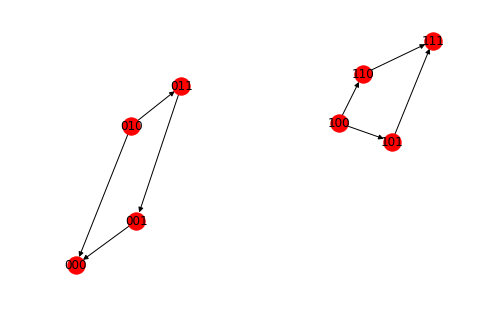

100%|██████████| 8/8 [00:00<?, ?it/s]


['000', '111']
8
16


In [57]:
def compute_state_space_network_asynchronous_updated(activator, netState):
    allState = list(map(list, itertools.product([0,1], repeat = len(activator))))
    node_list = []
      
    lengthAll = len(allState)
    
    checker1 = True
    
    #while (len(node_list) <= lengthAll):
    allSimulations = []
    visitedNode = []
    newSimulation = []
    next_node_state = []
    edgelist = []
    for j in range(0, lengthAll):
        next_node_state = compute_next_protein_state_asynchronous(activator, allState[j])
        for k in range(0, len(next_node_state)):
            edgelist.append((allState[j], next_node_state[k][1]))
    return edgelist

output = compute_state_space_network_asynchronous_updated(activator, [1,0,1])
#print(len(output))

edgelist = []
for seq in output:
    sequence = seq
    #edgelist.append([''.join([str(s) for s in seq[0]]),''.join([str(s) for s in seq[1]])])    
    edgelist.extend([(''.join([str(st) for st in sequence[i]]),
                      ''.join([str(st) for st in sequence[i + 1]])) for i in range (len(sequence)-1)
                    ])
    
G = nx.DiGraph(edgelist)
print(edgelist)


# Visualize this network
nx.draw_spring(G,with_labels=True)
plt.savefig('compute_space_state_network_asynchronous_updated.png')  
plt.show() 
from tqdm import tqdm

steady_list_async = []
for node in tqdm(G.nodes()):
    neighbor = list(G.neighbors(node))
    #print(neighbor)
    if len(neighbor) == 1 and neighbor[0] == node:
        steady_list_async.append(node)
        
print(steady_list_async)
print(G.number_of_nodes())
print(G.number_of_edges())

In [94]:
#choosing a random node

import random
#from random import choice

def walk_random():
    path = []
    a = list(G.nodes())
    print(a)
    r_node = random.choice(a)
    print(r_node)
    i = 0
    #if r_node not in steady_list_async:
    while not r_node in steady_list_async and i < 15:

        count = 1
        n = list(G.neighbors(r_node))
        next_node = random.choice(n)
        print(next_node)
#         if next_node == r_node:
#             count = count + 1
#             print(count)
        #print(next_node)
        path.append(next_node)
        r_node = next_node
        if r_node in steady_list_async:
            random_node = random.choice(a)
            if random_node not in steady_list_async:
                r_node = random_node
                
            else:
                while random_node in steady_list_async:
                    random_node = random.choice(a)
                r_node = random_node
        i = i + 1
                    
    return path

#print(walk_random())

path = walk_random()
print(path)


['000', '001', '010', '011', '100', '110', '101', '111']
010
010
011
001
000
101
111
111
111
011
001
000
111
011
001
000
['010', '011', '001', '000', '101', '111', '111', '111', '011', '001', '000', '111', '011', '001', '000']


In [103]:
def find_near_steady_state(comb, path):
    for i in range(0, len(path)):
        if comb == path[i]:
            index1 = i
            #print(index1)
            break
    
    for j in range(index1, len(path)):
        if path[j + 1] in steady_list_async:
            index2 = j + 1
            #print(index2)
            #k = k + 1
            break
    
    return index2 - index1
        
            
print(find_near_steady_state('101', path))
    

1


['010', '011', '001', '101', '011', '001', '011', '001']
[3, 2, 1, 1, 2, 1, 2, 1]


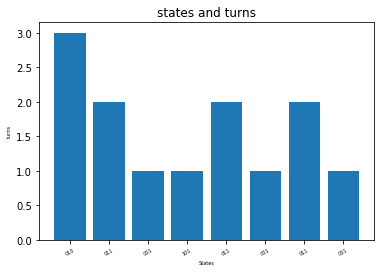

In [108]:
#import collections
import matplotlib.pyplot as plt
import numpy as np

label = []

for i in range(0, len(path)):
    if path[i] not in steady_list_async:
        label.append(path[i])
print(label)

turns = []

for j in range(0, len(label)):
    num = find_near_steady_state(label[j], path)
    turns.append(num)
print(turns)

#index_first  = np.arrange(len(label))

def plot_bar_x():
    # this is for plotting purpose
    index_first = np.arange(len(label))
    plt.bar(index_first, turns)
    plt.xlabel('States', fontsize=5)
    plt.ylabel('turns', fontsize=5)
    plt.xticks(index_first, label, fontsize=5, rotation=30)
    plt.title('states and turns')
    plt.show()
plot_bar_x()


In [37]:
def create_file_graph_asynchronous(edgelist):
    file_four1 = open("file_four_async1_up.txt", "w")
    
    head1 = "{\"head\": {'spec': {'shape': \"ellipse\",'color': \"grey\",'border': \"black\"}, \"id\": '%s'},"
    tail1 = "\"tail\": {'spec': {'shape': \"ellipse\",'color': \"grey\",'border': \"black\"}, \"id\": '%s'},"
    edge1 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle'}, \"id\": '%s-%s'}}\n"

    head2 = "{\"head\": {'spec': {'shape': \"rectangle\",'color': \"%s\",'border': \"black\"}, \"id\": '%s'},"
    tail2 = "\"tail\": {'spec': {'shape': \"rectangle\",'color': \"%s\",'border': \"black\"}, \"id\": '%s'},"
    edge2 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle'}, \"id\": '%s-%s'}}\n"

    head3 = "{\"head\": {'spec': {'shape': \"rectangle\",'color': \"blue\",'border': \"black\"}, \"id\": '%s'},"
    tail3 = "\"tail\": {'spec': {'shape': \"rectangle\",'color': \"blue\",'border': \"black\"}, \"id\": '%s'},"
    edge3 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"line-color\": 'blue'}, \"id\": '%s-%s'}}\n"

    style1 = head1+tail1+edge1
    style2 = head2+tail2+edge2
    style3 = head3+tail3+edge3

    
    file_four1.write("head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n")
    for i in range(0, len(edgelist)):
        file_four1.write("%s\t%s\t%s\t%s\t-\t" % (edgelist[i][0], edgelist[i][1], edgelist[i][0], edgelist[i][1]))
        if edgelist[i][0] in steady_list_async:
            if edgelist[i][0] == edgelist[i][1]:
                color_head = 'red'
                color_tail = 'red'
        elif edgelist[i][1] in steady_list_async:
            color_head = 'grey'
            color_tail = 'red'
            
        #file_four1.write(style2 % ((edgelist3[i][0], edgelist3[i][1], edgelist3[i][0], edgelist3[i][1])))

        else:
            color_head = 'grey'
            color_tail = 'grey'
        #file_four1.write(style2 % ((edgelist3[i][0], edgelist3[i][1], edgelist3[i][0], edgelist3[i][1])))
        file_four1.write(style2 % ((color_head,edgelist[i][0],color_tail,edgelist[i][1], edgelist[i][0], edgelist[i][1])))
    file_four1.close()

    
create_file_graph_asynchronous(edgelist)
    

In [ ]:
def compute_state_space_network_synchronous_updated(activator, netState):
    allState = list(map(list, itertools.product([0,1], repeat = len(activator))))
    node_list = []
      
    lengthAll = len(allState)
    
    checker1 = True
    
    #while (len(node_list) <= lengthAll):
    allSimulations = []
    visitedNode = []
    newSimulation = []
    next_node_state = []
    edgelist = []
    for j in range(0, lengthAll):
        next_node_state = compute_next_protein_state_synchronous(activator, allState[j])
        #for k in range(0, len(next_node_state)):
        edgelist.append((allState[j], next_node_state))
    return edgelist

output = compute_state_space_network_synchronous_updated(activator, [0,1,1])
print(len(output))

edgelist3 = []
for seq in output:
    sequence = seq
    edgelist3.extend([(''.join([str(st) for st in sequence[i]]),''.join([str(st) for st in sequence[i + 1]])) for i in range (len(sequence)-1)
                    ])
    
options = {'node_color' : 'blue','node_size': 300}   
G = nx.DiGraph(edgelist3)
#G = nx.path_graph(len(edgelist3) - 1)
nx.draw_spring(G, with_labels=True, font_weight = 'bold',**options)
#print(edgelist3)





# Visualize this network
#nx.draw_spring(G,with_labels=True, font_weight = 'bold')
plt.savefig('compute_space_state_network_synchronous_updated.png')  
plt.show()



steady_list_sync = []
for i in range(0, len(edgelist3)):
    if (edgelist3[i][0] == edgelist3[i][1]):
        steady_list_sync.append(edgelist3[i][0])
#print(steady_list_sync)

In [ ]:
def create_file_graph_one():
    file_four2 = open("file_four_sync_up.txt", "w")
    
    head1 = "{\"head\": {'spec': {'shape': \"ellipse\",'color': \"grey\",'border': \"black\"}, \"id\": '%s'},"
    tail1 = "\"tail\": {'spec': {'shape': \"ellipse\",'color': \"grey\",'border': \"black\"}, \"id\": '%s'},"
    edge1 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle'}, \"id\": '%s-%s'}}\n"

    head2 = "{\"head\": {'spec': {'shape': \"rectangle\",'color': \"%s\",'border': \"black\"}, \"id\": '%s'},"
    tail2 = "\"tail\": {'spec': {'shape': \"rectangle\",'color': \"%s\",'border': \"black\"}, \"id\": '%s'},"
    edge2 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle'}, \"id\": '%s-%s'}}\n"

    head3 = "{\"head\": {'spec': {'shape': \"rectangle\",'color': \"blue\",'border': \"black\"}, \"id\": '%s'},"
    tail3 = "\"tail\": {'spec': {'shape': \"rectangle\",'color': \"blue\",'border': \"black\"}, \"id\": '%s'},"
    edge3 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"line-color\": 'blue'}, \"id\": '%s-%s'}}\n"

    style1 = head1+tail1+edge1
    style2 = head2+tail2+edge2
    style3 = head3+tail3+edge3
    
    

    
    file_four2.write("head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n")
    for i in range(0, len(edgelist3)):
        file_four2.write("%s\t%s\t%s\t%s\t-\t" % (edgelist3[i][0], edgelist3[i][1], edgelist3[i][0], edgelist3[i][1]))
        #file_four1.write(style1 % ((edgelist3[i][0], edgelist3[i][1], edgelist3[i][0], edgelist3[i][1])))
        if (edgelist3[i][0] == edgelist3[i][1]):
            color_head = 'red'
            color_tail = 'red'
            

        elif edgelist3[i][1] in steady_list_sync:
            color_head = 'grey'
            color_tail = 'red'
            #file_four1.write(style2 % ((edgelist3[i][0], edgelist3[i][1], edgelist3[i][0], edgelist3[i][1])))
        
        else:
            color_head = 'grey'
            color_tail = 'grey'
            #file_four1.write(style2 % ((edgelist3[i][0], edgelist3[i][1], edgelist3[i][0], edgelist3[i][1])))
        file_four2.write(style2 % ((color_head,edgelist3[i][0],color_tail,edgelist3[i][1], edgelist3[i][0], edgelist3[i][1])))


    file_four2.close()
    
create_file_graph_one()

In [ ]:
options = {'node_color' : 'blue','node_size': 300}
G1 = nx.Graph()
G1.add_edges_from([(1,2), (3,4)], color = 'blue')
##.add_edge(1,3)
#1[1][2]['color'] = "blue"
#1.edges[1,3]['color'] = "red"
H = nx.DiGraph(G1)
#x.draw_circular(G1,with_labels=True)
nx.draw_random(G, **options)